<a href="https://colab.research.google.com/github/akmalia3/BMI_Calculator-Using_Steamlit/blob/main/Web_Scraping_News_APi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Berita Kesehatan di Indonesia Tahun 2023**

In [ ]:
! pip install requests

7cdd462f17f946cd96f1cbf9456c3207
https://www.pythonsherpa.com/static/files/html/NewsAPI.html

In [ ]:
import requests
import pprint
import json
import pandas as pd

In [ ]:
api_key="7cdd462f17f946cd96f1cbf9456c3207" # news api

In [ ]:
city = 'Indonesia'
query = f'{city}'
main_url=f"https://newsapi.org/v2/top-headlines?country=id&category=health"

In [ ]:
parameters = {
    #'q': 'health', # topik berita
    'pageSize': 100, # jumlah berita yang ingin ditampilkan
    'apiKey': api_key, #api key dari web newsapi
    'country': 'id',
    'from': '2023-08-24',
    'to': '2023-09-24',
}

# You are trying to request results too far in the past. Your plan permits you to request articles as far back as 2023-08-19, but you have requested 2022-01-20.
# You may need to upgrade to a paid plan.

In [ ]:
response = requests.get(main_url, params=parameters) # request get
response_json = response.json()
print(response_json.keys())

dict_keys(['status', 'totalResults', 'articles'])


In [ ]:
news = response_json['articles'] # akses artikel
print(news)

[{'source': {'id': 'google-news', 'name': 'Google News'}, 'author': 'Timlo Net', 'title': 'Bingung Mau Masak Seafood? Nah, Ini Dia Resep Tumis Udang Sederhana, Praktis dan Mudah - Timlo Net', 'description': None, 'url': 'https://news.google.com/rss/articles/CBMid2h0dHBzOi8vdGltbG8ubmV0L2JhY2EvNjg3MTk4MTY0NjYvYmluZ3VuZy1tYXUtbWFzYWstc2VhZm9vZC1uYWgtaW5pLWRpYS1yZXNlcC10dW1pcy11ZGFuZy1zZWRlcmhhbmEtcHJha3Rpcy1kYW4tbXVkYWgv0gF7aHR0cHM6Ly90aW1sby5uZXQvYmFjYS82ODcxOTgxNjQ2Ni9iaW5ndW5nLW1hdS1tYXNhay1zZWFmb29kLW5haC1pbmktZGlhLXJlc2VwLXR1bWlzLXVkYW5nLXNlZGVyaGFuYS1wcmFrdGlzLWRhbi1tdWRhaC9hbXAv?oc=5', 'urlToImage': None, 'publishedAt': '2023-09-23T12:30:00Z', 'content': None}, {'source': {'id': 'google-news', 'name': 'Google News'}, 'author': 'Beritabali.com - Informasi Terkini dari Bali', 'title': '7 Ikan Bergizi untuk Kecerdasan Otak Anak, Ada yang Ramah di Kantong - Beritabali.com - Informasi Terkini dari Bali', 'description': None, 'url': 'https://news.google.com/rss/articles/CBMiY2h0dHBzOi8v

In [ ]:
# looping untuk mendapatkan data dari api
data = []
for i in response_json['articles']:
  article = {
      'title': (i['title']),
      'author': (i['author']),
      'url': (i['url']),
      'description': (i['description']),
      'publishedAt': (i['publishedAt'])
  }
  data.append(article)

In [ ]:
# membuat tabel dari data
df = pd.DataFrame(data)
df

,title,author,url,description,publishedAt
0,"Bingung Mau Masak Seafood? Nah, Ini Dia Resep ...",Timlo Net,https://news.google.com/rss/articles/CBMid2h0d...,None,2023-09-23T12:30:00Z
1,"7 Ikan Bergizi untuk Kecerdasan Otak Anak, Ada...",Beritabali.com - Informasi Terkini dari Bali,https://news.google.com/rss/articles/CBMiY2h0d...,None,2023-09-23T12:26:24Z
2,Pakar Sebut Pasien Kanker yang Meninggal Bukan...,VIVA.co.id,https://news.google.com/rss/articles/CBMinAFod...,None,2023-09-23T12:10:12Z
3,"Dialami Pria 19 Tahun, Dokter Ungkap Alasan Ng...",detikHealth,https://news.google.com/rss/articles/CBMigQFod...,None,2023-09-23T11:00:05Z
4,"Manfaat Yogurt untuk Lambung, Baik Dikonsumsi ...",Merdeka.com,https://news.google.com/rss/articles/CBMicGh0d...,None,2023-09-23T10:07:00Z
...,...,...,...,...,...
59,SINDOgrafis: 5 Ikan yang Ampuh Tekan Kadar Kol...,SINDOnews Infografis,https://news.google.com/rss/articles/CBMidWh0d...,None,2023-09-22T07:00:00Z
60,"6 Bahan Makanan Murah untuk Cegah Stunting, In...",Mamagini,https://news.google.com/rss/articles/CBMiaGh0d...,None,2023-09-22T06:54:22Z
61,"Bos WHO Soroti Hipertensi, Penyakit Silent Kil...",detikHealth,https://news.google.com/rss/articles/CBMif2h0d...,None,2023-09-22T06:30:35Z
62,Cara Menurunkan Kolesterol Tinggi Melalui Pola...,iNFO iNDONESIA,https://news.google.com/rss/articles/CBMif2h0d...,None,2023-09-22T04:23:00Z


In [ ]:
# membuat csv dari tabel
df.to_csv('news.csv')

In [ ]:
! pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
text_combined = ''
for a in response_json['articles']:
  text_combined += a['title'] + ' '
print(text_combined[0:100])

Bingung Mau Masak Seafood? Nah, Ini Dia Resep Tumis Udang Sederhana, Praktis dan Mudah - Timlo Net 7


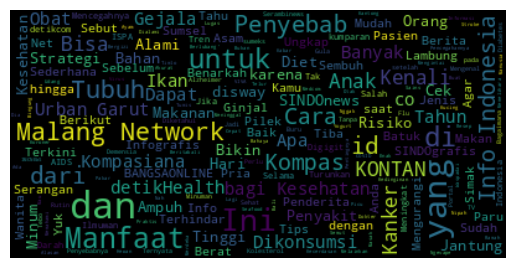

In [ ]:
wordcloud = WordCloud(max_font_size=30).generate(text_combined)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Dataset Kesehatan di Indonesia Google News**

Google News API

In [ ]:
import requests
import json

latitude -6.966667
longtitude 110.416664


In [ ]:
parameter = {'api_key': '65103b67b4b231bfdf1a3b1d',
             'q':'kesehatan', # keyword
             'num': 300, # number of results
             'gl': 'id',  # country name
             'lr': 'lang_id', # language
             'duration': '1/1/1/1/2022',
             'uule': 'w+CAIQICIfU2VtYXJhbmcsIEphd2EgVGVuZ2FoIEluZG9uZXNpYQ%3D%3D' # encode place Semarang
             }
request = requests.get('https://api.serpdog.io/news', params=parameter)


In [ ]:
response = request.json()
print(response.keys())

dict_keys(['meta', 'sub_articles', 'news_results', 'pagination', 'serpdog_pagination'])


[{'title': '8 Manfaat Jalan Kaki di Pagi Hari untuk Kesehatan - Kompas.com', 'snippet': 'KOMPAS.com - Berjalan kaki secara rutin sangat bermanfaat untuk kesehatan, seperti untuk menurunkan berat badan dan membuat tidur lebih...', 'source': 'Kompas Health', 'lastUpdated': '1 day ago', 'url': 'https://health.kompas.com/read/23I23100000568/8-manfaat-jalan-kaki-di-pagi-hari-untuk-kesehatan?page=all', 'imgSrc': '\\x3d'}, {'title': 'Gandeng Rumkit DKT, Pemeriksaan Kesehatan dan Donor Darah Diikuti Ratusan Prajurit Kodim Tegal - radartegal.disway.id', 'snippet': 'Kegiatan pemeriksaan kesehatan dan donor darah hari ini, Minggu 24 September 2023 digelar di Markas Kodim Tegal. Ratusan prajurit terlibat...', 'source': 'Radar Tegal', 'lastUpdated': '1 hour ago', 'url': 'https://radartegal.disway.id/read/667915/gandeng-rumkit-dkt-pemeriksaan-kesehatan-dan-donor-darah-diikuti-ratusan-prajurit-kodim-tegal', 'imgSrc': '\\x3d'}, {'title': 'Erick Thohir dan anaknya bagikan pesan atasi kesehatan mental',
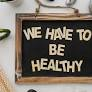
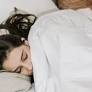
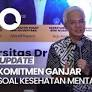
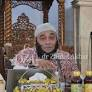
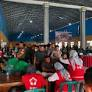
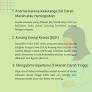
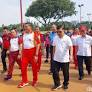
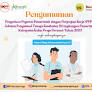
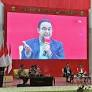
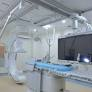
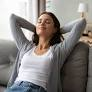
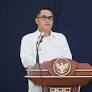
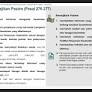
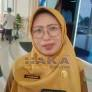
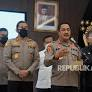
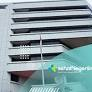
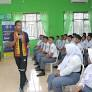
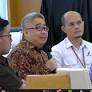
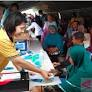
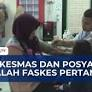
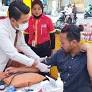
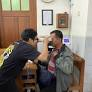
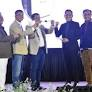
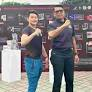
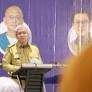
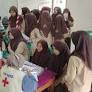
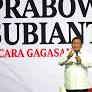
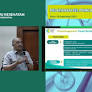
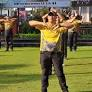
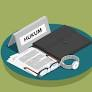
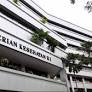
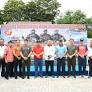

In [ ]:
result = response['news_results']
print(result)

In [ ]:
data = []
for i in response['news_results']:
  article = {
      'title': (i['title']),
      'source': (i['source']),
      'url': (i['url']),
      'description': (i['snippet']),
      'date': (i['lastUpdated'])
  }
  data.append(article)

In [ ]:
tabel = pd.DataFrame(data)
tabel

,title,source,url,description,date
0,8 Manfaat Jalan Kaki di Pagi Hari untuk Keseha...,Kompas Health,https://health.kompas.com/read/23I23100000568/...,KOMPAS.com - Berjalan kaki secara rutin sangat...,1 day ago
1,"Gandeng Rumkit DKT, Pemeriksaan Kesehatan dan ...",Radar Tegal,https://radartegal.disway.id/read/667915/gande...,Kegiatan pemeriksaan kesehatan dan donor darah...,1 hour ago
2,Erick Thohir dan anaknya bagikan pesan atasi k...,Antara News jatim,https://jatim.antaranews.com/berita/733662/eri...,Menteri Badan Usaha Milik Negara BUMN Erick Th...,1 hour ago
3,5 Manfaat Kacang Hijau Untuk Kesehatan dan Kha...,Kesehatan,https://kesehatan.kontan.co.id/news/5-manfaat-...,KESEHATAN - Ada sejumlah manfaat kacang hijau ...,11 hours ago
4,40 Kata-Kata Motivasi Diri untuk Menjaga Keseh...,Bola.com,https://www.bola.com/ragam/read/5404281/40-kat...,"Bola.com, Jakarta - Luangkan waktu membaca kat...",2 days ago
...,...,...,...,...,...
93,Link PDF 7.095 Formasi PPPK Kemenkes 2023 Tena...,KOMPAS.tv,https://www.kompas.tv/ekonomi/445937/link-pdf-...,"Dari total formasi PPPK Kemenkes 2023, alokasi...",1 day ago
94,10 Superfood untuk Jaga Kesehatan Otak hingga ...,Lifestyle Kompas,https://lifestyle.kompas.com/read/2023/09/24/0...,"Umumnya, superfood mengandung nutrisi yang len...",13 hours ago
95,6 Zodiak yang Cenderung Mengabaikan Kesehatan ...,Jambi Independent,https://jambiindependent.disway.id/read/669883...,"Zodiak ini cenderung egois, karena merasa bena...",15 hours ago
96,Cek 5 Manfaat Air Kelapa Untuk Kesehatan yang ...,Kesehatan,https://kesehatan.kontan.co.id/news/cek-5-manf...,Ada sejumlah manfaat air kelapa untuk kesehata...,6 hours ago


In [ ]:
tabel.to_csv('news_googlr_semarang.csv')

Google News

In [ ]:
from bs4 import BeautifulSoup
import pprint

In [ ]:
req = requests.get('https://www.google.com/search?q=kesehatan&gl=id&tbm=nws&num=100').text
soup = BeautifulSoup(req, 'lxml')
berita = soup.find('div', class_='SoaBEf')
print(berita)

None


In [ ]:
data1 = []
for a in soup.select('div.SoaBEf'):
  news = {
      'link': a.find('a')['href']
  }
  data1.append(news)

In [ ]:
dataset = pd.DataFrame(data1)
dataset

""
